<a href="https://colab.research.google.com/github/BrunoAzambuja/Classificacao_para_analise_de_risco_de_credito/blob/main/Classifica%C3%A7%C3%A3o_para_an%C3%A1lise_de_risco_de_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação para análise de risco de crédito
#### Modelos de machine learning aplicados na prevenção de inadimplência de clientes.

*by [Bruno Azambuja](https://www.brunoazambuja.com/m)*


<p align=center>  <img src="https://img.freepik.com/vetores-gratis/inadimplencia-ou-colapso-na-bolsa-de-valores_107791-85.jpg?1&w=826&t=st=1672689401~exp=1672690001~hmac=4d8775b1818e0c8657d4c5161b285bf04a07714c9b271ec534daff8eb3a553fe" width="40%"></p>

Uma das áreas que mais causam problemas para bancos, financiadoras e empresários é a taxa de inadimplência por parte da sua carteira de clientes.

Avaliar se uma pessoa irá deixar de cumprir com suas obrigações financeiras é de extrema importância, e pode causar um grande impacto no balanço da Instituição. Cada vez mais, soluções vêm sendo desenvolvidas e aprimoradas visando minimizar o risco de *default*. 

*Default* é o termo utilizado para indicar o não cumprimento das obrigações e/ou condições de um empréstimo (como financiamentos ou dívidas de cartão de crédito). Normalmente, o principal motivo para o descumprimento das condições de pagamento é incapacidade financeira do cliente.

Grandes bancos e Fintechs têm apostado cada vez mais em modelos de *Machine Learning* para previnir a inadimplência de alguns clientes. Dentre as principais instituições financeira, o [Nubank](https://nubank.com.br/sobre-nos) é uma das que mais tem se destacado no uso de Inteligência Artificial e times de *Data Science*.

O conjunto de dados a ser utilizado neste Projeto de *Data Science* parte de uma competição realizada pela Startup [Nubank](https://nubank.com.br/sobre-nos) a fim de revelar talentos e potenciais contratações pela Fintech.

# Entendendo os objetivos

Neste problema, o objetivo é prever qual a probabilidade de um cliente da Startup Nubank não cumprir com suas obrigações financeiras e deixar de pagar a sua fatura do Cartão de Crédito, ou seja criar um modelo que forneça a probabilidade de um cliente virar inadimplente.

Vale ressaltar que essa avaliação deve ser realizada no momento em que o cliente solicita o cartão (normalmente no primeiro contato com a instituição).

Espera-se que o modelo seja capaz de minimizar as perdas financeiras do Nubank, porém minimizando também os falsos positivos.

# Instalando as bibliotecas

Primeiramente vamos instalar as bibliotecas e importar todos os pacotes necessários para este estudo.

In [ ]:
# instalando bibliotecas
!pip install imbalanced-learn -q
!pip install shap

In [ ]:
# importar os pacotes necessários
import pandas as pd #
import numpy as np #
import matplotlib.pyplot as plt #
import seaborn as sns #
import joblib
import shap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scikitplot.metrics import plot_confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# random seed
np.random.seed(42)

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

# Importando os dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0). Consiste basicamente em um arquivo `csv` contendo 45.000 entradas e 43 colunas, este arquivo será importando para a estrutura *DataFrame* deste estudo.

In [ ]:
# importando os dados para um dataframe
path = ('/content/acquisition_train.csv')
df = pd.read_csv(path)

# visualizando as 5 primeiras entradas
df

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,696cb747-1159-0a29-6731-8c52c6c42f5d,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,...,730,"(-22.486891256430695, -44.909010639017616)",Facebook,768-5074915,73417.0,BR-GO,52148,"{'tags': ['n1', 'n7', 'n4', 'n0']}",Mozilla/5.0 (Linux; Android 6.0.1; SM-G920V Bu...,NaN
44996,92cd9b1a-9a8e-43ad-5d96-8e999128b472,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,NaN,...,28,"(-12.881449687799003, -46.43545330884514)",Waiting-list,772-3517810,26246.0,BR-RO,46084,"{'tags': ['n11', 'n5', 'n12']}",Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN
44997,febdd174-cf18-0be1-feb8-38399dd67d9e,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,NaN,...,940,"(-23.888982131800983, -50.645313285616645)",Waiting-list,334-9885724,101252.0,BR-SP,30570,"{'tags': ['dfa', 'c55', 'pro+aty']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,NaN
44998,a0a5a872-6165-b939-b711-37d045a0b5a8,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.0,100.476090,0.214697,86.759074,0.37,NaN,...,459,"(-5.14769885524928, -37.98386842511541)",Instagram,238-9568414,129844.0,BR-SP,12742,"{'tags': ['n9', 'n2']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN


Olhando o resumo das principais informações estatísticas somos capazes de destacar algumas observações:

* `id`: anônima, que representa um identificador único do cliente. Iremos eliminar esta coluna mais para frente, pois ela não contém nenhuma informação relevante;
* `target_default`: a variável alvo para analisar o risco de *default* (inadimplência) está na coluna;
* `score_1, score_2`: estão codificadas de alguma maneira, teremos que verificar a frente se existe uma quantidade de classes que possa ser convertida em informação útil;
* `score_3, score_4, score_5`: são numéricas, teremos que verificar a frente se existe uma quantidade de classes que possa ser convertida em informação útil;
* `reason, state, zip, channel, job_name, real_state`: que estão codificadas e também precisarão de alguma análise mais aprofundada para saber se é possível extrair alguma informação das mesmas;
* `profile_tags`: contém um dicionário com *tags* atribuídas a cada cliente, aparentemente;
* `target_fraud`: seria a variável alvo de outro modelo para este mesmo *dataset*, onde o objetivo seria a detecção de fraude;
* `lat_lon`: está em formato *string* contendo uma tupla com as coordenadas.

Com os dados importados para dentro de uma estrutura *dataframe*, pode-se iniciar a preparação dos dados, para que na sequência possamos buscar *insights* propostos para o EDA e que os dados também estejam em condições adequadas para desenvolvermos os modelos de machine learning.

# Preparando os dados

Esta etapa consiste em preparar nosso conjunto de dados para a construção do modelo. Nesta seção, executaremos as seguintes etapas de tratamento dos dados:

* Limpeza dos dados:
  * Preencher ou eliminar as linhas com valores faltantes;
  * Eliminar valores duplicados;
  * Tratar ou remover outliers.
* Seleção dos atributos:
  * Eliminar os *features* (atributos) que não contêm informações úteis.
* *Feature Engineering*:
  * Discretizar variáveis contínuas;
  * Decompor *features* categóricas;
  * Aplicar transformações às variáveis;
  * Agregar *features* para gerar novas.
* *Spliting data*:
  * Dividir o conjunto de dados entre dados de treinamento e teste.

O tratamento dos dados relacionado à *Feature Scaling* será aplicado na etapa de Modelos de Machine Learning deste estudo, pois nesta etapa poderemos avaliar o efeito de cada tipo de scaling sobre o desempenho dos modelos. Desta forma, aplicando *scaling* nesta etapa teremos mais assertividade quanto à escolha do tipo de ajuste.

Para o preparação dos dados nesta etapa primeiramente vamos gerar um novo *dataframe* onde será aplicado todo o tratamento proposto:

In [ ]:
# gerando dataframe
df_clean = df.copy()

###**Limpeza dos dados**

Nesta etapa serão realizadas algumas verificações para identificar possíveis dados discrepantes e para que assim possamos ajustá-los.

**Valores ausentes**

Na função abaixo, conseguimos verificar que não há valores ausentes neste *dataframe*.

In [ ]:
# checando os valores ausentes
(df_clean.isnull().sum() / df.shape[0]).sort_values(ascending=False)

target_fraud                                        0.966178
last_amount_borrowed                                0.665689
last_borrowed_in_months                             0.665689
ok_since                                            0.589889
external_data_provider_credit_checks_last_2_year    0.502844
external_data_provider_credit_checks_last_year      0.336089
credit_limit                                        0.306667
n_issues                                            0.256533
facebook_profile                                    0.099067
marketing_channel                                   0.079511
job_name                                            0.074133
target_default                                      0.072422
external_data_provider_email_seen_before            0.049622
lat_lon                                             0.030289
user_agent                                          0.016044
n_bankruptcies                                      0.015489
n_defaulted_loans       

Acima podemos observar diversas *features* ausentes no *dataframe*. Em relação à porcentagem de valores ausentes, observamos as seguintes condições:

* Diversas variáveis como `target_fraud, last_amount_borrowed, last_borrowed_in_months, ok_since, external_data_provider_credit_checks_last_2_year` possuem mais da metade dos valores ausentes;

* As variáves `external_data_provider_credit_checks_last_year, credit_limit, n_issues` possuem entre 25% e 34% do seus valores ausentes;

* A variável alvo `target_default` contém valores nulos que serão eliminados do *dataset*.

Sendo assim, o caso mais extremo `target_fraud` não representa um problema, pois é uma variável alvo que não interessa para a análise de risco de inadimplência, já as demais *features* deverão ser usadas com o devido cuidado.



In [ ]:
# ver resumo estatístico do dados numéricos
df_clean.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,...,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,...,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,...,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,...,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,...,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,...,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,...,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,...,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Olhando o resumo das principais informações estatísticas somos capazes de destacar algumas observações:

* A coluna `external_data_provider_credit_checks_last_2_year` possui valores mínimos, máximos e desvio-padrão iguais a zero;
* A coluna `external_data_provider_email_seen_before` apresenta o valor mínimo de -999, o que é estranho ao se considerar as outras informações. Após verificar de maneira mais aprofundada, chegou-se a conclusão que esse dados são *outliers* ou foram tratados inadequadamente. Substituiremos os valores iguais a -999 por `np.nan`;
* A coluna `reported_income` apresenta valores *inf*, que irão interferir na análise e modelo. Substituiremos valores do tipo `np.inf` por `np.nan` para trabalhar com os dados.

In [ ]:
# substituindo valores das features
df_clean.loc[df_clean['external_data_provider_email_seen_before'] == -999.0,'external_data_provider_email_seen_before'] = np.nan
df_clean['reported_income'] = df_clean['reported_income'].replace(np.inf,np.nan)

# eliminando as entradas que são NaN da feature target_default
df_clean.dropna(subset=['target_default'], inplace=True)

Apesar de não haver maiores informações sobre as *features*, podemos assumir como premissa que muitos valores são nulos devido a dois fatores:

* Há alguns itens que não são obrigatórios durante a etapa de preenchimento dos formulários, como a informação sobre o perfil do cliente no Facebook; e
* Não existe observação alguma referente à coluna, como é caso das colunas `last_amount_borrowed`, `last_borrowed_in_months` e `n_issues`.

De maneira geral, para as variáveis que se enquadram no segundo caso faremos as seguintes transformações: para os valores ausentes os campos serão substituidos por zero `0`, para as variáveis numéricas será adotado o valor da mediana, e para as variáveis categóricas o valor mais frequente.

Para estas transformações serão utilizadas funções conhecidas como `fillna` e `transform`.

In [ ]:
# substituindo os valores ausentes 
df_clean['last_amount_borrowed'].fillna(value=0, inplace=True)
df_clean['last_borrowed_in_months'].fillna(value=0, inplace=True)
df_clean['n_issues'].fillna(value=0, inplace=True)

# substituindo os valores NaN das variáveis numéricas
num_df = df_clean.select_dtypes(exclude='object').columns
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean.loc[:,num_df])
df_clean.loc[:,num_df] = imputer.transform(df_clean.loc[:,num_df])

# substituindo os valores NaN das variáveis categóricas
cat_df = df_clean.select_dtypes(include='object').columns
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean.loc[:,cat_df])
df_clean.loc[:,cat_df] = imputer.transform(df_clean.loc[:,cat_df])

Agora podemos verificar novamente se as variáveis escolhidas não possuem os valores nulos iniciais.

In [ ]:
# verificar a quantidade de dados nulos
df_clean.isnull().sum()

ids                                                 0
target_default                                      0
score_1                                             0
score_2                                             0
score_3                                             0
score_4                                             0
score_5                                             0
score_6                                             0
risk_rate                                           0
last_amount_borrowed                                0
last_borrowed_in_months                             0
credit_limit                                        0
reason                                              0
income                                              0
facebook_profile                                    0
state                                               0
zip                                                 0
channel                                             0
job_name                    

**Valores duplicados**

Esta é uma etapa importante à ser verificada para reduzirmos os ruídos neste tipo de trabalho.

In [ ]:
# verificando a existência de dados duplicados
duplicated = df_clean[df_clean.duplicated().values]
duplicated

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud


Como podemos observar o *dataframe* não apresentou dados duplicados, desta forma o podemos seguir para próxima etapa conecida como seleção de atributos.

###**Seleção de atributos**

Com a limpeza dos dados, agora podemos fazer a seleção das *features* do nosso *dataframe* eliminando e preservando os dados para que os objetivos propostos ao estudo sejam alcançados.

Sendo assim, uma outra análise interessante de se fazer diz respeito à contagem de valores únicos por *features*. Muitas vezes, variáveis numéricas podem esconder classes/categorias que melhor representariam uma *feature*, ou revelar uma quantidade elevada de classes para "variáveis categóricas":

In [ ]:
# gerando lista de valores únicos
df_clean.nunique().sort_values()

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 3
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

A contagem de valores únicos mostra que as colunas `external_data_provider_credit_checks_last_2_year` e `channel` apresentam um único valor possível. Como não há maiores informações sobre cada *feature* iremos descartar as duas colunas para o modelo de *Machine Learning*.

Também se percebe que `profile_phone_number` possui 45 mil valores únicos, não trazendo provavelmente nenhuma informação que possa contribuir para a análise.

Sendo assim estas e outras *features* que não apresentam relevância significativa aos objetivos propostos do estudo serão removidas com a função conhecida como `drop`.

In [ ]:
# removendo as colunas colunas
df_clean.drop(['ids',
               'target_fraud',
               'external_data_provider_credit_checks_last_2_year',
               'channel',
               'reason',
               'zip',
               'job_name',
               'external_data_provider_first_name',
               'lat_lon',
               'shipping_zip_code',
               'user_agent',
               'profile_tags',
               'application_time_applied',
               'email',
               'marketing_channel',
               'profile_phone_number',
               'shipping_state'],
              axis=1, inplace=True)

###**Feature Engineering**

As técnicas de *feature engineering* para *machine learning* é um tópico fundamental no aprendizado de máquina, é o termo utilizado para definir um conjunto de técnicas utilizado na criação e manipulação de features (recursos).

Porém, *feature engineering* não se trata apenas de selecionar bons recursos para um modelo. Esse processo também abrange a transformação matemática nas features existentes para extrair o máximo potencial dos dados e criação de novas features.

**Gerando features categóricas**

O tratamento de variáveis categóricas consiste em transformar um conjunto de dados categóricos em dados numéricos. É essencial que executemos a codificação de recursos porque a maioria dos modelos de *machine learning* só pode interpretar dados numéricos e não dados em forma de texto.

Primeiramente irei buscar os valores únicos por coluna, especificamente isso vai auxiliar na identificação das variáveis potencialmente categóricas. Para mais informações quanto ao tratamento de variáveis categórias, acesse este artigo que elaborei para o [Medium](https://medium.com/@brunoazambuja_78996/feature-engineering-lidando-com-vari%C3%A1veis-categ%C3%B3ricas-1335c37ace5b).

In [ ]:
# gerando a lista de valores únicos
print("Valores únicos (por coluna):\n{}\n".format(df_clean.nunique()))

Valores únicos (por coluna):
target_default                                         2
score_1                                                7
score_2                                               35
score_3                                               87
score_4                                            41741
score_5                                            41741
score_6                                            41741
risk_rate                                             81
last_amount_borrowed                               13481
last_borrowed_in_months                                3
credit_limit                                       19336
income                                             38849
facebook_profile                                       2
state                                                 50
real_state                                             5
ok_since                                             100
n_bankruptcies                                         6
n_

In [ ]:
# checando os tipos dos dados antes do tratamento
df_clean.dtypes

target_default                                        bool
score_1                                             object
score_2                                             object
score_3                                            float64
score_4                                            float64
score_5                                            float64
score_6                                            float64
risk_rate                                          float64
last_amount_borrowed                               float64
last_borrowed_in_months                            float64
credit_limit                                       float64
income                                             float64
facebook_profile                                      bool
state                                               object
real_state                                          object
ok_since                                           float64
n_bankruptcies                                     float

In [ ]:
# verificando os valores únicos das variável facebook_profile
df_clean['target_default'].head()

0    False
1    False
2     True
3    False
4    False
Name: target_default, dtype: bool

In [ ]:
# verificando os valores únicos das variável facebook_profile
df_clean['facebook_profile'].head()

0     True
1    False
2    False
3    False
4     True
Name: facebook_profile, dtype: bool

Como podemos ver a primeira coluna em que faremos a tranformação de variável categórica será a coluna `facebook_profile`, para isto utilizarei o `Labelencoder`.

In [ ]:
# criando a instância de labelencoder
labelencoder = LabelEncoder()

# atribuindo valores numéricos e armazenando em outra coluna
df_clean['target_default'] = labelencoder.fit_transform(df_clean['target_default'])

# atribuindo valores numéricos e armazenando em outra coluna
df_clean['facebook_profile'] = labelencoder.fit_transform(df_clean['facebook_profile'])

In [ ]:
# verificando os valores únicos das variável facebook_profile
df_clean['target_default'].head()

0    0
1    0
2    1
3    0
4    0
Name: target_default, dtype: int64

In [ ]:
# verificando os valores únicos das variável facebook_profile
df_clean['facebook_profile'].head()

0    1
1    0
2    0
3    0
4    1
Name: facebook_profile, dtype: int64

Continuando com a preparação dos dados, também irei realizar o `LabelEncoder` para possibilitar que as variáveis possam ser codificadas de forma categórica e alimentar o modelo de *Machine Learning*, o restante da transformação será feita sobre os dados do tipo `object`.

In [ ]:
# extraindo as colunas categóricas
cols_cat = df_clean.select_dtypes('object').columns

# codificar cada coluna categórica
for col in cols_cat:
  df_clean[col+'_encoded'] = LabelEncoder().fit_transform(df_clean[col])
  df_clean.drop(col, axis=1, inplace=True)

# verificando as 5 primeiras e últimas entradas do novo dataframe
df_clean

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_encoded,score_2_encoded,state_encoded,real_state_encoded
0,0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,...,444.0,2.0,0.0,51.0,645.0,57849.0,0,10,44,1
1,0,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,...,346.0,1.0,0.0,17.0,243.0,4902.0,3,16,47,1
2,1,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,65023.65,...,6.0,2.0,1.0,9.0,65.0,163679.0,3,9,32,3
3,0,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,54591.0,68830.01,...,406.0,3.0,1.0,38.0,815.0,1086.0,0,21,23,3
4,0,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,25213.0,60011.29,...,240.0,2.0,1.0,46.0,320.0,198618.0,2,1,47,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0,280.0,96.379531,0.416693,103.667082,0.17,14766.42,36.0,10627.0,100013.24,...,72.0,2.0,1.0,7.0,730.0,73417.0,3,16,46,1
44996,0,370.0,96.124977,0.692196,97.977973,0.27,0.00,0.0,36262.0,95026.69,...,51.0,1.0,1.0,1.0,28.0,26246.0,6,31,36,1
44997,0,280.0,102.377780,0.530938,93.687747,0.30,0.00,0.0,0.0,106020.90,...,476.0,2.0,1.0,27.0,940.0,101252.0,4,24,47,4
44998,1,240.0,100.476090,0.214697,86.759074,0.37,0.00,0.0,0.0,185018.07,...,35.0,0.0,1.0,2.0,459.0,129844.0,6,5,47,1


**Aplicando transformação das variáveis**

Primeiramente vamos verificar os tipos de cada *feature* para que possamos confirma se há necessidade de novas transformações.

In [ ]:
# checando as caracteriticas dos dados
df_clean.dtypes

target_default                                       int64
score_3                                            float64
score_4                                            float64
score_5                                            float64
score_6                                            float64
risk_rate                                          float64
last_amount_borrowed                               float64
last_borrowed_in_months                            float64
credit_limit                                       float64
income                                             float64
facebook_profile                                     int64
ok_since                                           float64
n_bankruptcies                                     float64
n_defaulted_loans                                  float64
n_accounts                                         float64
n_issues                                           float64
application_time_in_funnel                         float

Como podemos ver as variáveis categóricas estão com os seus tipos ajustados adequadamente conforme as exigências dos modelos de machine learning do tipo classificação, não havendo necessidade de novas transformações.

###**Spliting data**

Lembre-se que os dados de teste não podem ser usados para treinar o modelo. Quando estivermos com nosso modelo pronto, aí sim, usaremos o modelo de teste para fazer previsões. Com isso, vamos separar os dados entre X e Y como entre treino e test aplicando a técnica conhecida como `split`. Para este estudo o tamanho dos dados de teste serão de 30%.

In [ ]:
# separando a feature matrix da target vector
X = df_clean.drop('target_default', axis=1).select_dtypes(exclude='object')
y = df_clean['target_default']

# dividindo os dados entre treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# verificando o formato dos conjuntos
print("Formato dataset orginal", df_clean.shape)
print("Formato dataset do X treino", X_train.shape)
print("Formato dataset do X teste", X_test.shape)

Formato dataset orginal (41741, 26)
Formato dataset do X treino (29218, 25)
Formato dataset do X teste (12523, 25)


# Exploratory Data Analysis (EDA)

Esta etapa foi dividida entre tópicos que visam tirar insights e elevar a consciência situacional a respeito do *dataframe* de clientes da fintech. Sendo assim, a análise exploratória tem por objetivo permitir um entendimento de como os dados estão estruturados.

Este é um processo crítico que visa realizar investigações iniciais nos dados para descobrir padrões, detectar anomalias, testar hipóteses e verificar suposições com a ajuda de estatísticas resumidas e representações gráficas.

###**Características**

A fim de começar este projeto, irei verificar a integridade e usabilidade do dataset. Com os dados tratados, conseguimos fazer uma análise exploratória identificando suas principais caracteríscas. 

Para isso, deixarei impresso as primeiras e últimas entradas de dados, os nomes das colunas, os tipos de variáveis por coluna, e a quantidade de dados ausentes.

In [ ]:
# vendo as primeiras e últimas entradas
df_clean

,target_default,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,...,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_encoded,score_2_encoded,state_encoded,real_state_encoded
0,0,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,65014.12,...,444.0,2.0,0.0,51.0,645.0,57849.0,0,10,44,1
1,0,370.0,97.062615,0.942655,92.002546,0.24,0.00,0.0,39726.0,100018.91,...,346.0,1.0,0.0,17.0,243.0,4902.0,3,16,47,1
2,1,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,25213.0,65023.65,...,6.0,2.0,1.0,9.0,65.0,163679.0,3,9,32,3
3,0,510.0,101.599485,0.987673,94.902491,0.32,0.00,0.0,54591.0,68830.01,...,406.0,3.0,1.0,38.0,815.0,1086.0,0,21,23,3
4,0,500.0,98.474289,0.532539,118.126207,0.18,0.00,0.0,25213.0,60011.29,...,240.0,2.0,1.0,46.0,320.0,198618.0,2,1,47,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0,280.0,96.379531,0.416693,103.667082,0.17,14766.42,36.0,10627.0,100013.24,...,72.0,2.0,1.0,7.0,730.0,73417.0,3,16,46,1
44996,0,370.0,96.124977,0.692196,97.977973,0.27,0.00,0.0,36262.0,95026.69,...,51.0,1.0,1.0,1.0,28.0,26246.0,6,31,36,1
44997,0,280.0,102.377780,0.530938,93.687747,0.30,0.00,0.0,0.0,106020.90,...,476.0,2.0,1.0,27.0,940.0,101252.0,4,24,47,4
44998,1,240.0,100.476090,0.214697,86.759074,0.37,0.00,0.0,0.0,185018.07,...,35.0,0.0,1.0,2.0,459.0,129844.0,6,5,47,1


A visualização das 5 primeiras e as 5 últimas entradas já permite entender como o dataset está composto. Mesmo que não haja uma definição sobre o significado dos nomes das features, é possível inferir, uma vez que a natureza das empresas de telecomunicações são parecidas.

In [ ]:
# checando as caracteriticas dos dados
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41741 entries, 0 to 44999
Data columns (total 26 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   target_default                                   41741 non-null  int64  
 1   score_3                                          41741 non-null  float64
 2   score_4                                          41741 non-null  float64
 3   score_5                                          41741 non-null  float64
 4   score_6                                          41741 non-null  float64
 5   risk_rate                                        41741 non-null  float64
 6   last_amount_borrowed                             41741 non-null  float64
 7   last_borrowed_in_months                          41741 non-null  float64
 8   credit_limit                                     41741 non-null  float64
 9   income                      

In [ ]:
# gerando a lista de valores únicos
print("Valores únicos (por coluna):\n{}\n".format(df_clean.nunique()))

Valores únicos (por coluna):
target_default                                         2
score_3                                               87
score_4                                            41741
score_5                                            41741
score_6                                            41741
risk_rate                                             81
last_amount_borrowed                               13481
last_borrowed_in_months                                3
credit_limit                                       19336
income                                             38849
facebook_profile                                       2
ok_since                                             100
n_bankruptcies                                         6
n_defaulted_loans                                      5
n_accounts                                            44
n_issues                                              44
application_time_in_funnel                           501
ex

Neste primeiro momento podemos identificar alguma das principais características do *dataset*. Com isso vamos seguir explorando as características destes dados e identificando os insights de negócio que podemos extrair destes dados.

###**Balanceamento**

Por fim, nesta análise exploratória, vamos ver o balanceamento das classes do *dataframe*. Para identificar se os nossos dados podem estar com algum tipo de bias (viés) e tirar alguns insights do negócio.

**Balanceamento do dataframe dos clientes: Target default**

Abaixo podemos verificar o balanceamento dos dados com relação à *feature* `target default`. Estes dados nos mostram a frequência em que ocorre casos onde a situação de Defaut é positiva ou negativa para cada clientes deste *dataframe*.

É possível identificar que a classe *No* ocorre com frequência muito superior à classe *Yes*. Isso será considerado na etapa de balanceamento dos dados e construção do modelo de *machine learning*.

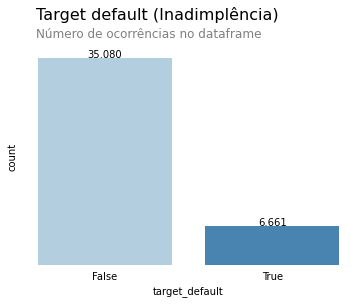

In [ ]:
# gerando o gráfico
fig, ax = plt.subplots()
sns.countplot('target_default',palette= 'Blues', data=df, ax=ax)
plt.title("Target default (Inadimplência)", fontsize=16, x=0.045, y=1.1, loc="left")
plt.suptitle("Número de ocorrências no dataframe", color = "gray", fontsize=12, x=0.16, y=0.95, ha="left")

# definindo visibilidade de parâmetros
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True) 
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
for pos in ['right', 'top', 'left', 'bottom']: 
    plt.gca().spines[pos].set_visible(False)

#colocando os rótulos
for retangulo in ax.patches:
  ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height(),
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'), # adicionando o texto da altura
          ha = 'center')
# plotando o gráfico
plt.show();

###**Distribuições**

Agora vamos ver a distribuição das classes do dataset. Para identificar se os nossos dados podem estar com algum tipo de bias (viés) e tirar alguns *insights* do negócio.

Apesar deste *dataframe* ser composto majoritariamente por variáveis binárias ou categóricas, é possível ver abaixo, pelo método `describe`, que não há indícios da presença de outliers. Um indicativo de que o tratamento dos dados ajusram os dados adequadamente para o modelo.

In [ ]:
# gerando dados numéricos das features
df_clean.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,facebook_profile,...,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,score_1_encoded,score_2_encoded,state_encoded,real_state_encoded
count,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,41741.00000,4.174100e+04,41741.000000,...,41741.000000,41741.000000,41741.000000,41741.000000,41741.000000,4.174100e+04,41741.000000,41741.000000,41741.000000,41741.000000
mean,346.459836,100.006820,0.499416,99.919399,0.294451,4512.735564,13.742747,31156.17242,7.108012e+04,0.333844,...,247.748545,1.504396,0.670731,28.034906,500.491771,1.050597e+13,1.912149,17.186483,27.814331,2.092499
std,110.102271,3.183821,0.288085,10.022703,0.101561,7811.069725,19.977492,30202.18905,5.225978e+04,0.471591,...,146.326172,1.114207,0.469953,17.361019,287.993121,2.581896e+14,1.485103,9.112314,16.201360,1.114136
min,0.000000,86.191572,0.000035,60.663039,0.000000,0.000000,0.000000,0.00000,4.821180e+03,0.000000,...,0.000000,0.000000,0.000000,-1.000000,0.000000,4.030000e+02,0.000000,0.000000,0.000000,0.000000
25%,270.000000,97.862546,0.251595,93.182517,0.220000,0.000000,0.000000,17331.00000,4.401958e+04,0.000000,...,120.000000,1.000000,0.000000,13.000000,252.000000,5.091000e+04,1.000000,10.000000,12.000000,1.000000
50%,340.000000,100.017950,0.500174,99.977774,0.290000,0.000000,0.000000,25213.00000,6.004409e+04,0.000000,...,248.000000,2.000000,1.000000,28.000000,502.000000,1.014210e+05,2.000000,16.000000,31.000000,3.000000
75%,420.000000,102.143100,0.747630,106.630991,0.360000,7510.600000,36.000000,34997.00000,8.503289e+04,1.000000,...,375.000000,2.000000,1.000000,43.000000,747.000000,1.510430e+05,3.000000,26.000000,44.000000,3.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.00000,5.000028e+06,1.000000,...,500.000000,3.000000,1.000000,59.000000,1000.000000,6.355500e+15,6.000000,34.000000,49.000000,4.000000


Por fim, vamos ver as distribuições de todas as *features* do *dataframe*. É possível ver abaixo uma distribuição geral das features, pelo método `pairplot`.

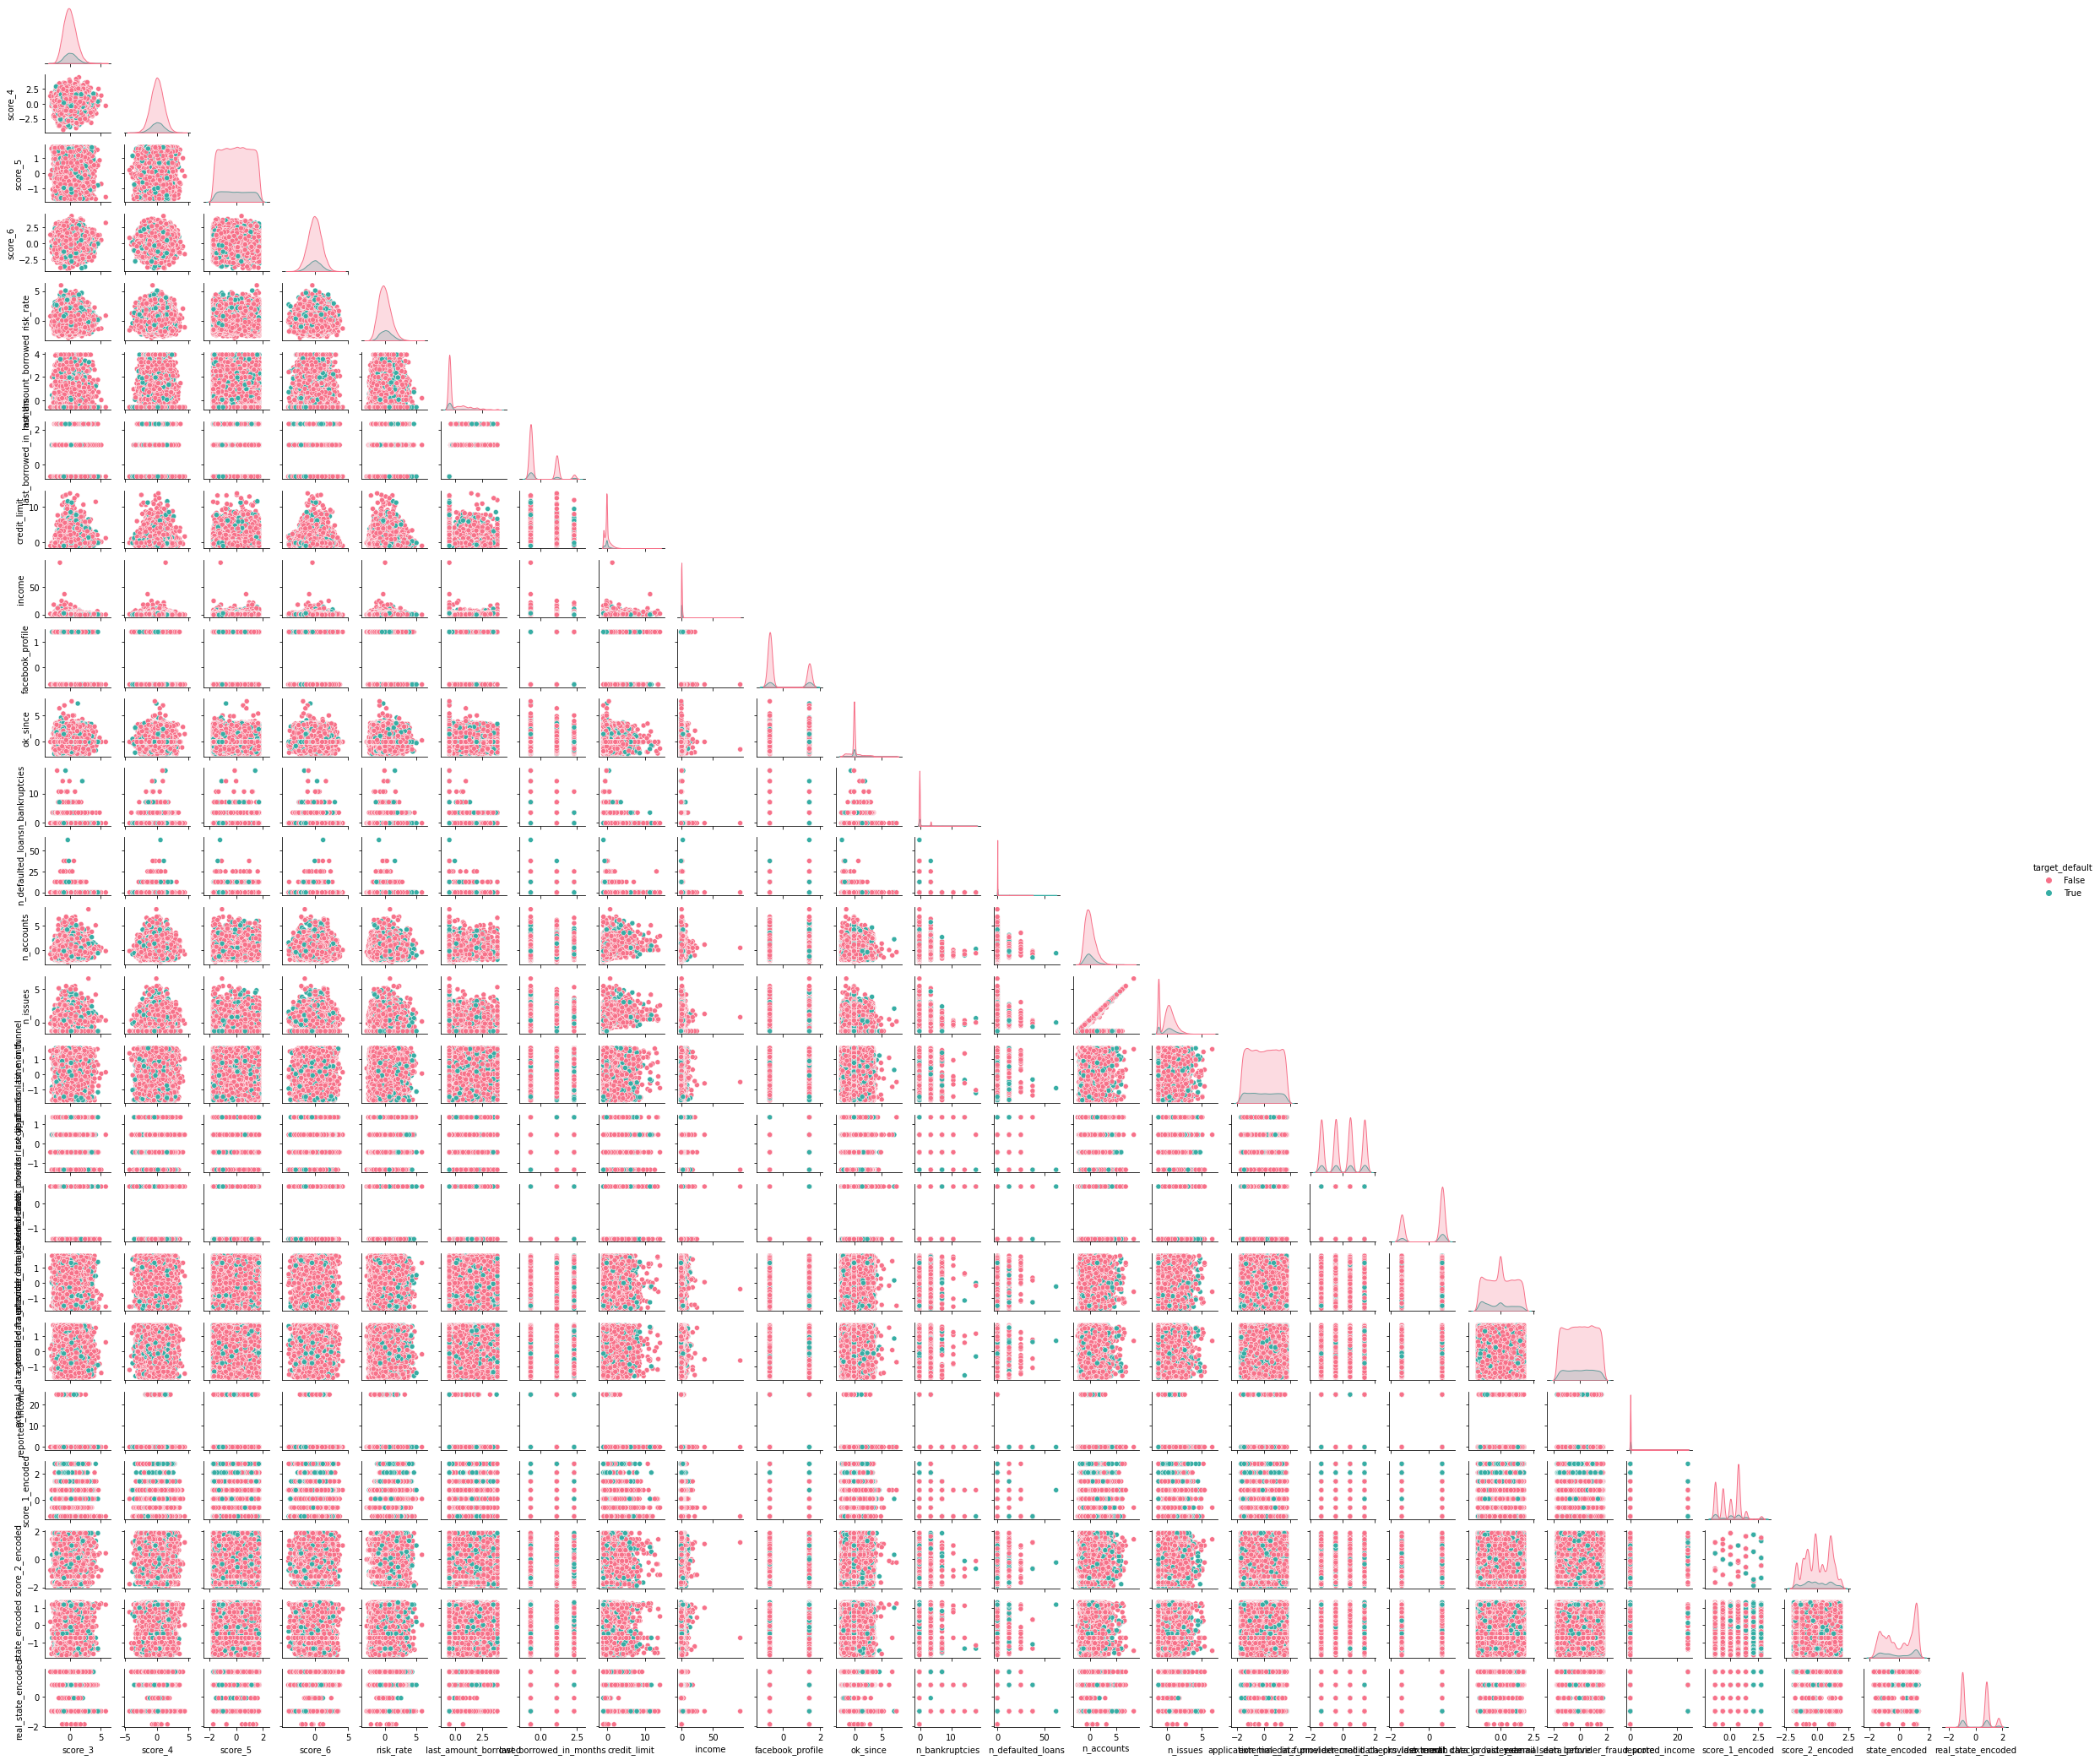

In [ ]:
# corrigindo descrição dos dados
y = df_clean.replace({'target_default': {'False': 'No default', 'True': 'Default'}})

# gerando os gráficos de correlações do dataframe
sns.pairplot(y, hue='target_default', palette='husl', height=1.5, corner=True);

Conforme os gráficos acima, podemos tirar insights sobre os gráficos em que conseguimos observar altas correlações, assim como identificar as *features* que apresentam baixa correlações.

A codificação dos dados para preservação do sigilio do negócio impossibilita  uma análise mais aprofundada das *features*, o que dificulta a obtenção de insights sobre estas informações.

###**Correlações**

**Correlação** significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis. 

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação;
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`.

Este foi o critério utilizado como base para avaliarmos o nível de correlação entre as variáveis.

<center><img alt="pearson" width="30%" src="http://3.bp.blogspot.com/_HqjPVvZ1cRI/R_O_zshrecI/AAAAAAAABOQ/oMLkaCX5l7c/s400/corel-interpretacao.gif"></center>

Primeiramente criei a matriz que demonstra a correlação entre as variáveis definidas:

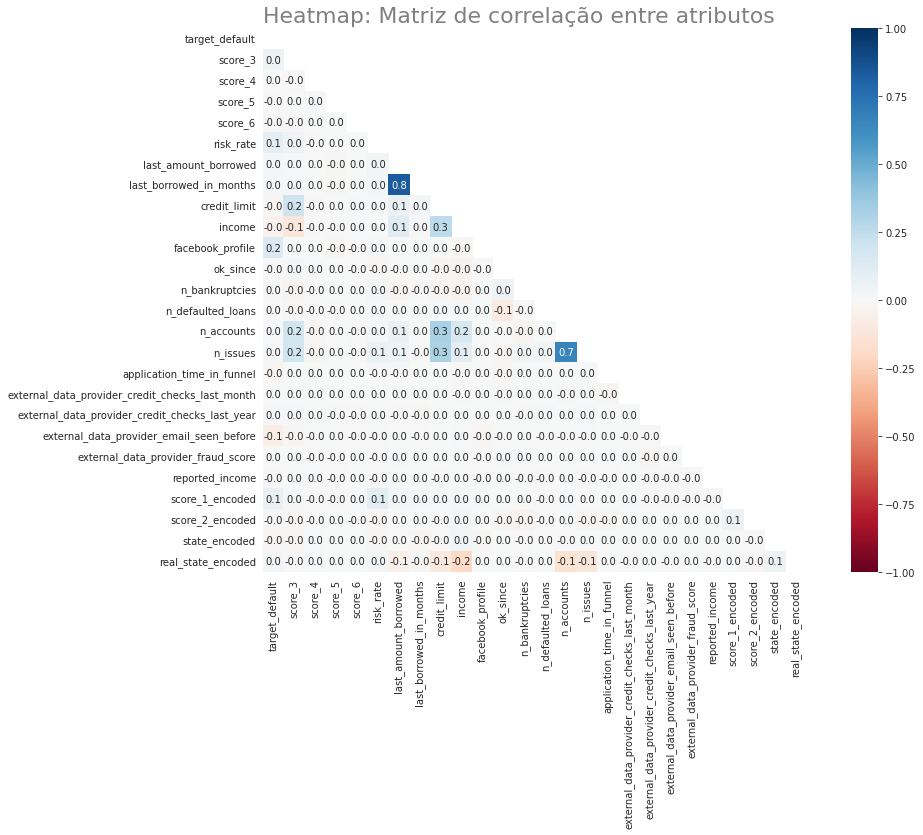

In [ ]:
# criando a matriz de correlação
corr = df_clean.corr()

# plotar um heatmap a partir das correlações
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# definindo parâmetros
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr, cmap='RdBu', fmt='.1f', mask=mask, vmax=1, vmin=-1, square=True, annot=True)

# adicionando títulos
plt.title("Heatmap: Matriz de correlação entre atributos", fontsize=22, color = "gray", loc="left");

Conforme podemos ver na matriz de correlação acima podemos tirar os seguintes insights:

* `last_borrowed_in_months` vs `last_amount_borrowed`: apresenta a maior correlação encontrada, indicando uma correlação forte positiva com um valor de 0,8;

* `n_issues` vs `n_accounts`: indicando uma correlação moderada positiva com um valor de 0,7;

* `credit_limit` vs `income`, `credit_limit` vs `n_accounts` e `credit_limit` vs `n_issues`: indicando uma correlação fraca positiva com um valores de 0,3;

* demais variáveis indicam uma correlação mais fraca que as indicadas anteriormente.

As correlações destacadas acima nos mostram algumas variáveis que temos como oportunidade para um aprofundamento de análise na busca de insights de negócio. Um ponto importante a ser destacado é a diferenciação entre correlação e causalidade, como é bem descrito [neste artigo](https://towardsdatascience.com/correlation-is-not-causation-ae05d03c1f53), para termos uma análise exploratória dos dados mais assertiva.

Além disso, na etapa de construção do modelo será realizado uma análise chamada *feature importances*. Essa visualização basicamente nos mostra qual a importância de cada uma das variáveis, nos indicando os seus respectivos pesos sobre a variável alvo do modelo desenvolvido.

# Modelos de Machine Learning

Após separarmos os dados entre dados de teste e treino, precisamos:

* Definir as melhores métricas para avaliar os nossos modelos, a fim de chegarmos ao modelo mais adequado conforme os objetivos propostos neste estudo;
* Criar uma baseline a ser batida nas etapas seguintes. Considerando o contexto deste estudo e por não termos disponível uma métrica inicial, utilizaremos um modelo arbitrário, não parametrizado, como baseline;
* Comparar os diferentes modelos propostos, considerando a métrica alvo e o baseline como referência;
* Definir os melhores ajustes de scaling e balanceamento, a fim de avaliar o quanto cada tipo de ajuste influencia no desempenho do modelo;
* Otimizar os hiperparâmetros do modelo escolhido, considerando o conjunto de treino disponível;
* Rodar o modelo sobre os nossos dados de teste a fim de se avaliar o seu desempenho final;
* Aplicar *feature importance* para estimar o quanto cada recurso dos dados contribuiu para a previsão do modelo.


###**Métrica dos modelos**

Para decidirmos que métrica usar, precisamos analisar algumas de nossas opções:

* `Accuracy`: caso optemos por otimizar o modelo por essa métrica precisamos estar cientes que esse pode não ser o método ideal, mas para uma análise inicial do problema, essa métrica pode nos ajudar a criar uma solução generalista.

* `Recall`: o ajuste do modelo apartir dele visa priorizar que não hajam Falsos Negativos. Ou seja, é preferível negar um cliente que não traria prejuízo à empresa, do que aceitar um que traga. Essa é a forma que são tratados, por exemplo, fraudes em cartão de crédito, modelos médicos, etc.

* `Precision`: com essa métrica, essencialmente, estamos dizendo que Falsos Positivos são ok, e não queremos ter Falsos Negativos. Basicamente, é preferível aceitar clientes que possam trazer prejuízo, do que deixar de aceitar clientes que não trarão. Essa é a forma que são tratados, por exemplo, modelos para spam de e-mails. Esta métrica é preferível quando tratamos de dados desbalanceados.

O que vai definir a melhor métrica é a estratégia de negócio da empresa, e seus valores. Já para este estudo utilizei o `Accuracy` como métrica de escolha do modelo, no intuito de realizar uma análise generalista.

Na sequência para o desenvolvimento do modelo escolhido, utilizei como métrica alvo o `Recall`, no intuito de realizar uma melhoria de desempenho quanto aos Falsos Negativos. Desta forma, é preferível negar um cliente que não traria prejuízo à empresa por inadimplência, do que aceitar um que traga. A escolha desta outra métrica está alinhada com os objetivos de se buscar uma redução nos prejuízos.



###**Base Line**

Para podermos comparar o desempenho, assim como melhorar os demais modelos, criei um baseline simples, não foi feito nenhum ajuste nos hiperparâmetros, porém apliquei técnica conhecida como *cross validation*. Essa função do *cross validation* desenvolvida poderá ser utilizada em todos os modelos deste estudo.

O `cross_val_score` é uma técnica que busca avaliar como a análise estatística se generaliza para um conjunto de dados independente. Essa técnica avalia modelos de *machine learning*, treinando vários modelos em subconjuntos dos dados de entrada disponíveis. Neste [*link*](https://towardsdatascience.com/cross-validation-430d9a5fee22) é possível acessar mais informações sobre esta técnica.


In [ ]:
def val_model(X, y, clf, quite=False):
   
    X = np.array(X)
    y = np.array(y)

    model = clf
    score_accuracy = cross_val_score(model, X, y, scoring='accuracy')
    score_recall = cross_val_score(model, X, y, scoring='recall')
    score_precision = cross_val_score(model, X, y, scoring='precision')

    if quite == False:
        print("Accuracy: {:.4f} (+/- {:.2f})".format(score_accuracy.mean(), score_accuracy.std()))
        print("Recall: {:.4f} (+/- {:.2f})".format(score_recall.mean(), score_recall.std()))
        print("Precision: {:.4f} (+/- {:.2f})".format(score_precision.mean(), score_precision.std()))
    return (score_accuracy.mean(), score_recall.mean(), score_precision.mean())

Esta função realiza o cross-validation com os dados de treino para determinado modelo.

Os argumentos são:
* `X`: dataframe, contém as variáveis independetes;
* `y`: series, vetor contendo a variável alvo;
* `clf`: modelo classificador escolhido;
* `quite`: indica se a função deve imprimir os resultados ou não [formato bool].

Retorna:
* `scores.mean`: média dos scores da cross-validation [formato float].

Com a função definida, podemos seguir com o desenvolvimento do nosso baseline. O modelo classificador escolhido para este estudo será o `Random Forest Classifier`. Conforme descrito anteriormente, vamos testar o desempenho deste modelo sobre os dados de treino considerando a métrica `acurácia`.


In [ ]:
# criando a baseline e gerando o desempenho do modelo
rf = RandomForestClassifier()
score_baseline = val_model(X_train, y_train, rf)

Accuracy: 0.8382 (+/- 0.00)
Recall: 0.0276 (+/- 0.01)
Precision: 0.5345 (+/- 0.05)


###**Comparação de modelos**

Agora irei comparar o desempenho de vários modelos a fim de identificar e escolher o melhor. Novamente, serão utilizados apenas dados de treino. Estes são os modelos escolhidos como referência comparativa deste estudo:

* Random Forest Classifier (Baseline)
* Decision Tree Classifier
* SGD Classifier
* SVC
* Logistic Regression
* XGB Classifier
* LGBM Classifier

In [ ]:
# instanciando os modelos
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
sgdc = SGDClassifier()
svc = SVC()
lr = LogisticRegression()
xgb = XGBClassifier()
lgbm = LGBMClassifier()

# definindo variáveis
model = []
ml_metrics = []

# treinando o modelo e gerando os respectivas métricas
for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    ml_metrics.append(val_model(X_train, y_train, clf, quite=True))

pd.DataFrame(data=ml_metrics, index=model, columns=['Accuracy', 'Recall', 'Precision'])

,Accuracy,Recall,Precision
RandomForestClassifier,0.837669,0.027346,0.492097
DecisionTreeClassifier,0.739133,0.256839,0.227212
SGDClassifier,0.702396,0.400000,0.000000
SVC,0.837292,0.000000,0.000000
LogisticRegression,0.837292,0.000000,0.000000
XGBClassifier,0.839414,0.048800,0.576248
LGBMClassifier,0.838422,0.067732,0.528285


**Escolha do modelo**

Ao realizar os testes com diferentes modelos, podemos ver que o `XGBClassifier`retornou os melhores resultados na métrica `Accuracy`. A margem foi pequena, o que sugere que, dada a devida parametrização, qualquer modelo dessa lista poderia ser tão eficiente ou até mais eficiente do que o XGB, mas devido ao seu resultado inicial, iremos seguir com ele. Já quanto à métrica `Recall` apresentou baixo desempenho.

O baixo desempenho do `Recall` pode indicar a necessidade de ajustes dos dados assim de dos parâmetros do modelo. Para isso, iremos aplicar os métodos de scalling, balanceamento e a otimização de parâmetros.

###**Scaling e Balanceamento**

**Feature Scaling**

Nesta etapa apliquei a técnica conhecida como *Scaling*, esta técnica tem como objetivo ajustar a magnitude dos diferentes *featuring*. Para implementarmos as técnicas de *Scaling* podemos aplicar tanto a Normalização com o `MinMaxScaler()` como a Padronização com o `StandardScaler()`, estas são as duas técnicas de dimensionamento de recursos mais importantes e comumente utilizada.

Estas técnicas transformam as *features* da seguinte forma:

* `MinMaxScaler()`: normalmente significa redimensionar os valores em um intervalo de (0,1);
* `StandardScaler()`: normalmente significa redimensionar os dados para ter uma média de 0 e um desvio padrão de 1 (variância unitária). 

Neste [*link*](https://towardsdatascience.com/normalization-vs-standardization-cb8fe15082eb) é possível acessar mais informações desta técnica.

In [ ]:
# instanciando o modelo
xgb = XGBClassifier()

In [ ]:
# # normalizando os dados
# scaler = MinMaxScaler().fit(X_train)
# X_train = scaler.transform(X_train)

# # desempenho do modelo dados normalizados
# score_baseline = val_model(X_train, y_train, xgb)

Accuracy: 0.8416 (+/- 0.00)
Recall: 0.0383 (+/- 0.01)
Precision: 0.5344 (+/- 0.03)


In [ ]:
# padronizando os dados
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# desempenho do modelo dados padronizado
score_baseline = val_model(X_train, y_train, xgb)

Accuracy: 0.8419 (+/- 0.00)
Recall: 0.0373 (+/- 0.00)
Precision: 0.5425 (+/- 0.05)


Acima podemos ver, que o modelo de *scaling* que apresentou melhor desempenho de `Recall`foi do tipo padronizado (`StandardScaler()`), sendo assim esta técnica será a escolhida para os dados nas etapas seguintes.

**Balanceamento do modelo**

Uma vez que temos um baseline para comparar se os ajustes melhoram ou pioram o desempenho do modelo, irei realizar o balanceamento dos dados e ver como isso irá impactar. As técnicas escolhidas foram *Under Sampler* e *Over Sampler*.

Seguindo recomendações de algumas literaturas, os dados foram padronizados antes de usar essa técnica de balanceamento. Lembrando, é importante que o balanceamento aconteca apenas com os dados de treino, os dados de teste devem permanecer intocáveis.

In [ ]:
# # undersample
# rus = RandomUnderSampler()
# X_train, y_train = rus.fit_resample(X_train, y_train)

# # desempenho do modelo dados undersample
# score_baseline = val_model(X_train, y_train, xgb)

Accuracy: 0.6530 (+/- 0.01)
Recall: 0.6445 (+/- 0.02)
Precision: 0.6557 (+/- 0.01)


In [ ]:
# oversample
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

# desempenho do modelo dados oversample
score_baseline = val_model(X_train, y_train, xgb)

Accuracy: 0.8604 (+/- 0.16)
Recall: 0.7731 (+/- 0.34)
Precision: 0.9260 (+/- 0.02)


Acima podemos ver, que o modelo de balanceamento que apresentou melhor desempenho foi do tipo `Over Sampler`, sendo assim esta técnica será a escolhida para os dados nas etapas seguintes.

###**Otimização de hiperparâmetros**

Um hiperparâmetro é um tipo de parâmetro, externo ao modelo, definido antes do início do processo de aprendizagem. É ajustável e pode afetar diretamente o desempenho de um modelo.

Antes disso, devemos avaliar quais parâmetros podemos ajustar ao trabalhar com o XGBoost. Podemos encontrar a lista completa [aqui](https://xgboost.readthedocs.io/en/latest/parameter.html), ou podemos utilizar o método `get_params` para visualizar parâmetros que podem ser otimizados para obtermos os melhores resultados. Para mais informações em relação ao tuning de hiperparâmetros do XGBoost, acesse esse [link](https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663).

In [ ]:
# verificando os parâmetros
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

As duas técnicas de otimização dos hiperparâmnetros mais comuns são o *Random Search* e o *Grid Search*. Considerando o número de combinações de parâmetros escolhidos, optei por utilizar o *Random Search*, pois ela é menos computacionalmente dispendiosa. Este otimizador de hiperparâmetros é uma pesquisa aleatória sobre cada combinação de valores de parâmetros especificados. Acesse este [*link*](https://towardsdatascience.com/a-practical-introduction-to-grid-search-random-search-and-bayes-search-d5580b1d941d) para mais informação sobre as diferenças destes otimizadores e seus respectivos funcionamentos

O primeiro parâmetro do *XGBoost* escolhido para este estudo foi:

* `learning_rate`: a taxa de aprendizado determina o tamanho da etapa em cada iteração, enquanto seu modelo otimiza em direção ao seu objetivo. Uma baixa taxa de aprendizado torna a computação mais lenta e requer mais rodadas para alcançar a mesma redução no erro residual que um modelo com uma alta taxa de aprendizado. Mas otimiza as chances de alcançar o melhor ideal.
O valor deve estar entre 0 e 1. O padrão é 0.1;
* `gamma`: gama é um parâmetro de pseudo-regularização (multiplicador de Lagrange) e depende dos outros parâmetros. Quanto maior a Gama, maior a regularização. Pode ser qualquer inteiro. O padrão é 0;
* `subsample`: representa a fração de observações a serem amostradas para cada árvore. Um valor mais baixo evita o excesso de ajuste, mas pode levar ao subajuste. O valor deve estar entre 0 e 1. O padrão é 1;
* `max_depth`: profundidade máxima por árvore. Uma árvore mais profunda pode aumentar o desempenho, mas também a complexidade e as chances de sobreajuste.
O valor deve ser um inteiro maior que 0. O padrão é 3;
* `n_estimators`: número de árvores em nosso conjunto. Equivalente ao número de rodadas de impulsionamento. O valor deve ser um inteiro maior que 0. O padrão é 100;
* `colsample_bytree`: representa a fração de colunas a serem amostradas aleatoriamente para cada árvore. Pode melhorar o overfitting.
O valor deve estar entre 0 e 1. O padrão é 1.

In [ ]:
# instanciando o modelo
xgb = XGBClassifier()

# definindo os parâmetros a serem testados
param_random = {
  'learning_rate': [0.001, 0.01, 0.1],  
  'gamma':[0, 1, 5],
  'subsample':[0.5, 1, 3.5],
  'max_depth': [1, 3, 5],
  'n_estimators': [100, 500, 1000],
  'colsample_bytree': [0.1, 0.5, 1]
 }

# identificar melhores parâmetros
kfold = StratifiedKFold(n_splits=3, shuffle=True)
random_search = RandomizedSearchCV(xgb, param_random, scoring="recall", n_jobs=-1, cv=kfold)
random_result = random_search.fit(X_train, y_train)

# ver resultados
print("Melhor Recall: {:.4f} para {}".format(random_result.best_score_, random_result.best_params_))

Melhor Recall: 0.8193 para {'subsample': 0.5, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.1}


Acima podemos ver a combinação de parâmetos que obtiveram o melhor desempenho de `Recall` sobre os dados de treino se comparado ao desempenho da etapa de comparação de modelos.

Fato é que todos esses hiperprâmetros ajustados, conseguiram melhorar o desempenho do modelo XGBoost, considerando `Recall` como sendo a única métrica de importância (premissa assumida por este autor).

### **Avaliação de desempenho**

Tendo o modelo de *machine learning* definido, otimizado os seus hiperparâmetros, agora vamos avaliar o desempenho deste modelo aplicando sobre ele os dados de teste. 

O objetivo desta avaliação é mensurar o seu desempenho sobre os novos dados, dados o qual o modelo não obteve contato na etapa de seu desenvolvimento.

              precision    recall  f1-score   support

           0       0.84      0.98      0.90     10462
           1       0.97      0.81      0.88     10462

    accuracy                           0.89     20924
   macro avg       0.90      0.89      0.89     20924
weighted avg       0.90      0.89      0.89     20924

Recall: 0.8082



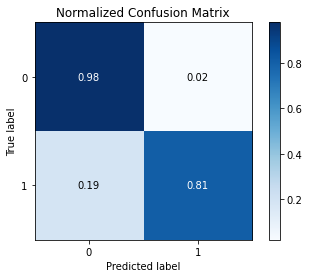

In [ ]:
# instanciando o modelo
ml_model = XGBClassifier(learning_rate=0.1, gamma=1, subsample=1, max_depth=5, n_estimators=100, colsample_bytree=0.1, random_state=42)

# treinando o modelo
X_train = scaler.transform(X_train)
X_train, y_train = oversample.fit_resample(X_train, y_train)
ml_model.fit(X_train, y_train)

# fazendo a previsão
X_test = scaler.transform(X_test)
X_test, y_test = oversample.fit_resample(X_test, y_test)
y_pred = ml_model.predict(X_test)

# gerando o classification report
print(classification_report(y_test, y_pred))

# imprimindo o recall do modelo sobre os dados de teste
print("Recall: {:.4f}\n".format(recall_score(y_test, y_pred)))

# plotando matriz de confusão de teste
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

Os dados de testes não haviam sido passados para o modelo ainda. No entanto, ele manteve um desempenho próximo àquele estimado anteriormente, graças a um bom trabalho de otimização nos parâmetros.

Ainda há espaço para se tentar outras técnicas de balanceamento de dados e também técnicas de machine learning como feature engineering e feature selection, assim como ajustar os parâmetros do modelos considerando outras métricas.

Na próxima etapa deste estudo foram elaboradas visualizações de pontuação do classificador que exibem as instâncias no espaço do modelo para entender melhor como o modelo está fazendo as previsões.

###**Feature importance**

Existem várias maneiras diferentes de aumentar a compreensão do seu modelo e a *feature importance* é uma delas. A *feature importance* ajuda a estimar o quanto cada recurso de seus dados contribuiu para a previsão do modelo. 

Depois de realizar testes de importância de recursos, você pode descobrir quais recursos estão causando o maior impacto na tomada de decisões do seu modelo. Em outras palavras, esta análise mede o poder preditivo de cada variável. 

Para este estudo, usarei a biblioteca *shap*. Esta é uma biblioteca muito poderosa em *feature importance*. Para mais informações, acesse esse o [*link*](https://towardsdatascience.com/a-novel-approach-to-feature-importance-shapley-additive-explanations-d18af30fc21b).



**Summary Plot**

Para obter uma visão geral de quais recursos são mais importantes para um modelo, podemos plotar os valores *shap* para cada recurso. O gráfico abaixo classifica os recursos pela soma das magnitudes do valor *shap* em todas as amostras e usa os valores *shap* para mostrar a distribuição dos impactos que cada recurso tem na saída do modelo. A cor representa o valor do recurso (vermelho é alto, azul é baixo).

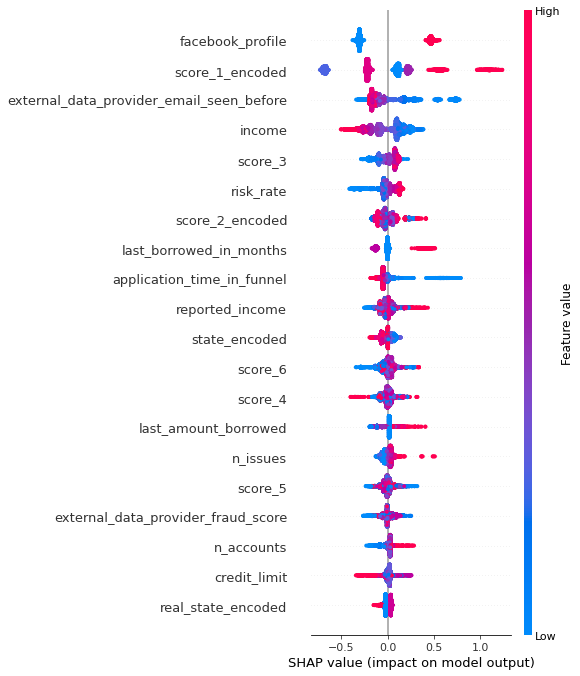

In [ ]:
# gerando o gráfico
explainer = shap.TreeExplainer(ml_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

**Summary Bar Plot**

Também podemos simplesmente tomar o valor absoluto médio dos valores *shap* de cada recurso para obter um gráfico de barras padrão. Este gráfico pode ser gerado através da função `plot_type="bar"`; esta função produz barras empilhadas de várias classes, priorizando-as por relevância:

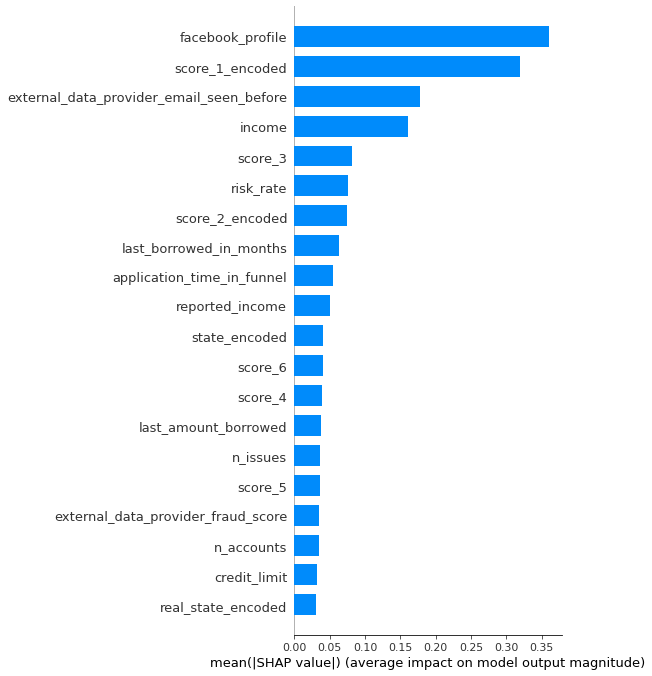

In [ ]:
# gerando o gráfico
shap.summary_plot(shap_values, X_test, plot_type="bar")

Conforme podemos ver, esses gráficos nos dizem quais recursos são os mais importantes para um modelo e, portanto, podemos tornar nossos modelos de aprendizado de máquina mais interpretáveis e explicativos.

# Finalizando o modelo

**Análise dos dados gerado pelo modelo**

Aqui podemos visualizar tanto os dados gerados pelo modelo de regressão desenvolvido neste estudo como os dados reais de custo do seguro de vida do nosso *dataset* original. Neste *dataframe* conseguimos fazer uma comparação visual destes dados.

In [ ]:
# gerando novo dataframe de output comparativo
output = pd.DataFrame({'predict_default': y_pred, 'real_default': y_test})
output.head(60)

,predict_default,real_default
0,0,0
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
20919,1,1
20920,1,1
20921,1,1
20922,1,1


**Salvando o Modelo**

Agora que terminamos nosso trabalho com o modelo, é hora de se preocupar em como mantê-lo utilizável e pronto para fazer novas previsões em novos dados.

Com a função `joblib.dump` conseguimos salvar o nosso modelo treinado, pronto para uso. Dentro dele também está contido todo o pipeline de pré-processamento que foi utilizado. Basta passar o conjunto de dados para fazer as previsões.

In [ ]:
# salvando o modelo como um pickle em um arquivo
joblib.dump(ml_model, 'classifier_default.pkl')

['classifier_default.pkl']

**Carregando um Modelo**

Com o modelo carregado, é fácil fazer novas previsões com ele, assim como fizemos ao finalizar nosso modelo.

Para isso, vamos utilizar o método `load_model`, passando como parâmetro o nome do arquivo do modelo.

In [ ]:
# carregando o modelo do arquivo
ml_model_from_joblib = joblib.load('classifier_default.pkl')
 
# usando o modelo carregado para fazer predições
ml_model_from_joblib.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1])

# Conclusão do estudo

O modelo de *machine learning* desenvolvido nos indica o risco de crédito através de um *target* do tipo binária, ele faz uma previsão se há ou não o risco de inadimplência. Neste modelo desenvolvido obtivemos um desempenho em um patamar satisfatório, atendendo os objetivos propostos incialmente neste estudo.

O desenvolvimento do modelo baseado na métrica `Recall` proporcionou uma melhoria significativa de desempenho, desta forma aumentamos significativamente as chances de reduzirmos os prejuízos do negócio com a aplicação de técnicas de *machine learning*.

Além disso, a *exploratoty data analysis (EDA)* proporcionou insights relevantes que contribuiram para o desenvolvimento de um modelo com uma melhor performance.